<a href="https://colab.research.google.com/github/ZavionH3nd3rson/Used-Cars-Price-Prediction/blob/main/BostonHousingMarketproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for statistics
from scipy import stats

# Library to split the data
from sklearn.model_selection import train_test_split

# Importing libraries for building linear regression model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset
Boston_df = pd.read_csv('drive/MyDrive/MIT Elective Project/Boston.csv')

In [ ]:
# Check first 5 rows of the dataset
print(Boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [ ]:
print (Boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


Observations


*   There are **no missing values**
*   There are **506 observations** and **13 columns**


*   **ALL** variables are numerical in nature given each column has a datatype of **float64** or **int64**





In [ ]:
# X is the feature matrix and y is the target vector
X = Boston_df.drop('MEDV', axis=1) # all columns except the target
y = Boston_df['MEDV'] # target variable

# Splitting data into train set and test set 80/20 split, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Observations


*   We are not given what data is the test set and train set so we are using the **train_test_split** function to randomly split the data within its respective datasets to train and test the performance of our predictive model, respectively


*   **X** and **y** represent your independent variables (features) and dependent variable (target), respectively


*   We define X (independent variables) by dropping our y (dependent variable)
*   We define y by dropping our X


*   **test_size=0.2** means 20% of your data will be used as the test set, and 80% as the training set


*   **random_state** ensures reproducibility and consistency of the 80/20 split








## Data Overview

- Observations

- Sanity checks

In [ ]:
X_train.info() #check info on dependent variables
y_train.info() #check info on target variable "MEDV"

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 41.0 KB
<class 'pandas.core.series.Series'>
Index: 404 entries, 477 to 102
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
404 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


Observations


*   Randomly selected, there are **404 observations** and **13 columns** in the (X, y) train set which represent **80%** of the total data in the Boston dataset.
  



In [ ]:
train_df = pd.concat([X_train, y_train], axis=1) # function to create (X,y) matrix to define our train dataframe "train_df", from our testing data
train_df.head() # view first few rows of our train set


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28,18.2


In [ ]:
#check info on our dependent variables and target variable(y) "MEDV" within our test dataset
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 173 to 75
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  LSTAT    102 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 10.4 KB
<class 'pandas.core.series.Series'>
Index: 102 entries, 173 to 75
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
102 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


Observations:

Randomly selected, there are **102 observations** and 13
columns in the (X, y) **test set** which represent **20%** of the total data in the Boston dataset.

In [ ]:
test_df = pd.concat([X_test, y_test], axis=1) # function to create (X,y) matrix to define our test dataframe "test_df", from our training data
test_df.head() # view first few rows of our test set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27,16.1


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

<Axes: xlabel='MEDV'>

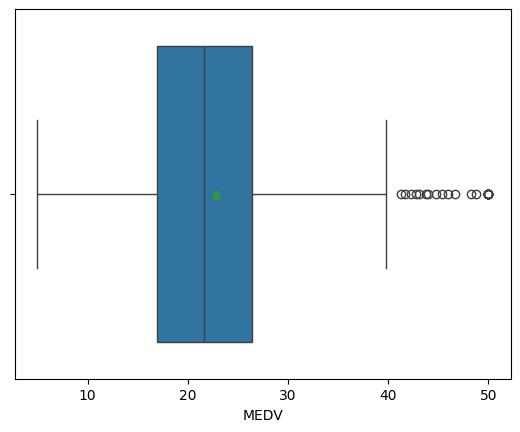

In [ ]:
sns.boxplot(x=train_df['MEDV'], showmeans=True)


Observations


*  Analzying the boxplot, you can see that the distibution of "MEDV" is slightly skewed to the right with a significant amount of outliers, which can affect our model performance and skew the results of what we perceive to be our mean and median point within the given dataset.




<Axes: xlabel='MEDV', ylabel='Count'>

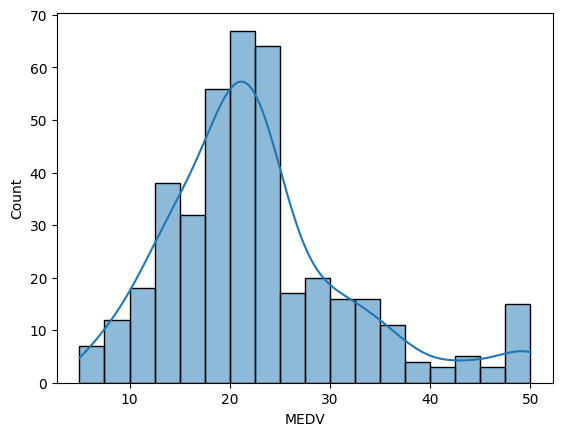

In [ ]:
sns.histplot(x=train_df['MEDV'], kde = True)

Observations



*   The variable MEDV is a slightly right-skewed distribution which means that their are certain homeowners who live in areas in boston whose median home prices are much higher than the median value of your avg homeowner




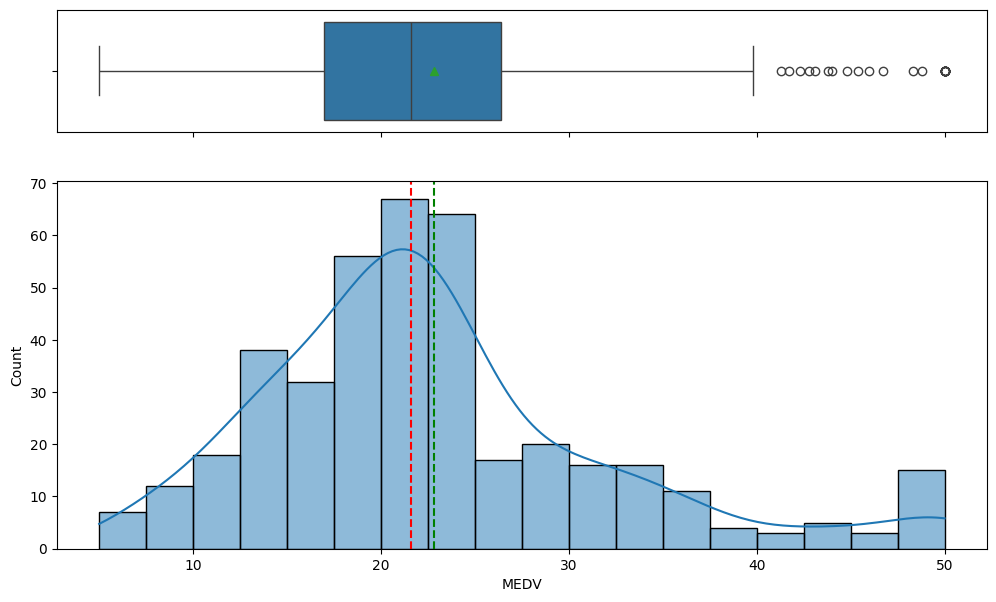

In [ ]:
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={"height_ratios" : (1,3)}, figsize = (12,7))
sns.boxplot(x=train_df['MEDV'], showmeans=True, ax=ax[0])
sns.histplot(x=train_df['MEDV'], kde = True, ax=ax[1])
ax[1].axvline(x=train_df['MEDV'].mean(), color='green', linestyle='--')
ax[1].axvline(x=train_df['MEDV'].median(), color='red', linestyle='--')

Observation


*   The distribution of target variable MEDV is slightly right skewed with the median lying around 20 and mean approx. around 22




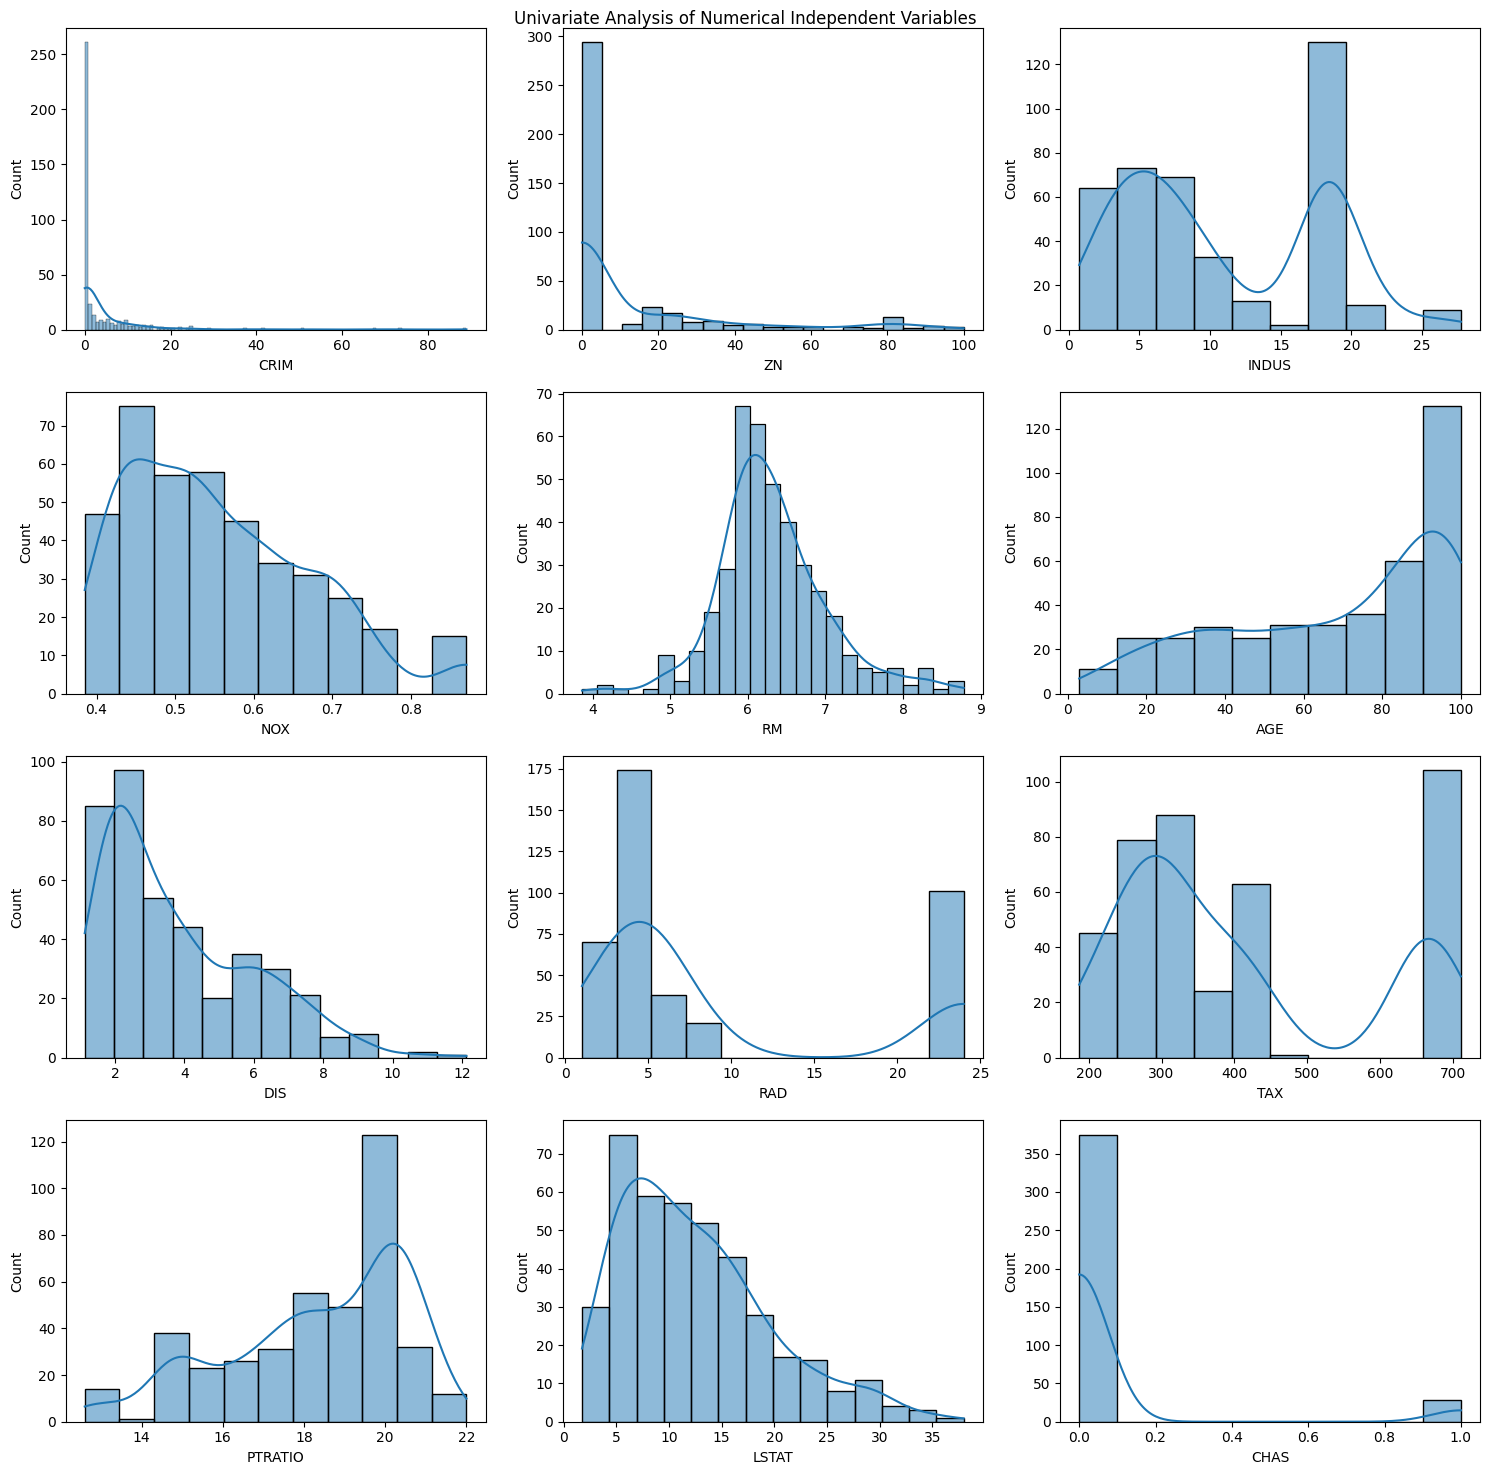

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

fig.suptitle('Univariate Analysis of Numerical Independent Variables')

sns.histplot(x=train_df['CRIM'], kde = True, ax=axes[0, 0])
sns.histplot(x=train_df['ZN'], kde = True, ax=axes[0, 1])
sns.histplot(x=train_df['INDUS'], kde = True, ax=axes[0, 2])
sns.histplot(x=train_df['NOX'], kde = True, ax=axes[1, 0])
sns.histplot(x=train_df['RM'], kde = True, ax=axes[1, 1])
sns.histplot(x=train_df['AGE'], kde = True, ax=axes[1, 2])
sns.histplot(x=train_df['DIS'], kde = True, ax=axes[2, 0])
sns.histplot(x=train_df['RAD'], kde = True, ax=axes[2, 1])
sns.histplot(x=train_df['TAX'], kde = True, ax=axes[2, 2])
sns.histplot(x=train_df['PTRATIO'], kde = True, ax=axes[3, 0])
sns.histplot(x=train_df['LSTAT'], kde = True, ax=axes[3, 1])
sns.histplot(x=train_df['CHAS'], kde = True, ax=axes[3, 2])

plt.tight_layout()
plt.show()

Observations

*  From the above plots, because there a multiple peaks in our independent variables **TAX** and **INDUS** we can assume there may be multimodal distribution within those two variables

*   The variable TAX shows that we can assume that there are two groups of homebuyers and one group is paying a significant higher amount in property taxes than the populous of owner occupied homes.





*   From the above plot, we can see that the independent variables, **AGE** and **RATIO** have a left skewed distribution within the dataset
*   From the above plot, we can also see that independent variables **DIS**, **LSAT**, and **NOX**
have a right skewed distribution.







<Axes: >

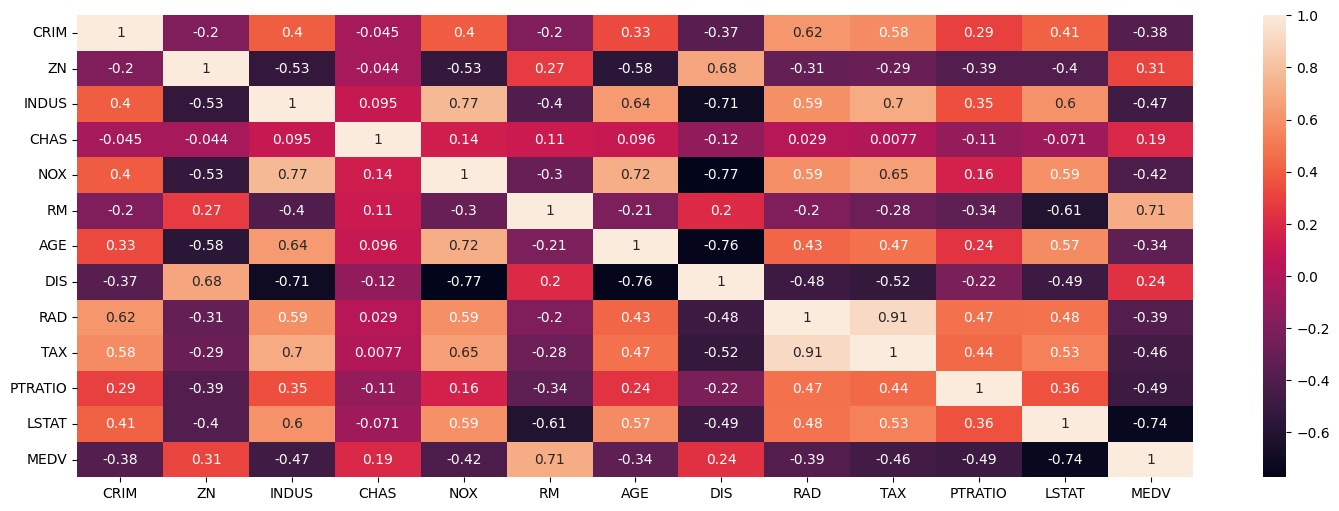

In [ ]:
fig = plt.figure(figsize=(18,6))

sns.heatmap(train_df.corr(), annot=True)

**Observations:**


*   From the above plot, it seems that there is a significant positive correlation of **.71**% between independent variable **RM** and the target variable **MEDV**
*   We can **infer** that the number of rooms per house is the **main idependent variable** that has the strongest **linear relationship** to the target variable **MEDV**


*   For the remaining, it does not seem like there is much positive correlation from the other variables that is significant enough to contribute towards having a positive linear relationship with our target variable **MEDV**





*   From the above plot, with a negative correlation score of **-.74%**, we can also infer that our dep. variable **LSTAT** has a strong negative relationship with our **MEDV**


**Positive linear relationship of >=.7%:**

*   From the above heat map, we can see that there is a strong positive correlation between **NOX** and independent variables **AGE(.72%)** and **INDUS(.77%)**
*   From the above heat map, we can also see that there is a strong positive correlation between **TAX ** and independent variables **RAD(.91%)** and **INDUS(.70%)**

*   From the above heat map, we can see that there is a strong positive correlation between variable **IDUS** and independent variables **TAX(.70%)** and **NOX(.77%)**
*   



Strong negative relationship **<=.7%:**


*   From the above heat map, we can see that there is a **strong negative correlation** between variable **DIS** and independent variables **INDUS(-.71%)**, **NOX(-.77%)**, and **AGE(-.76%)**











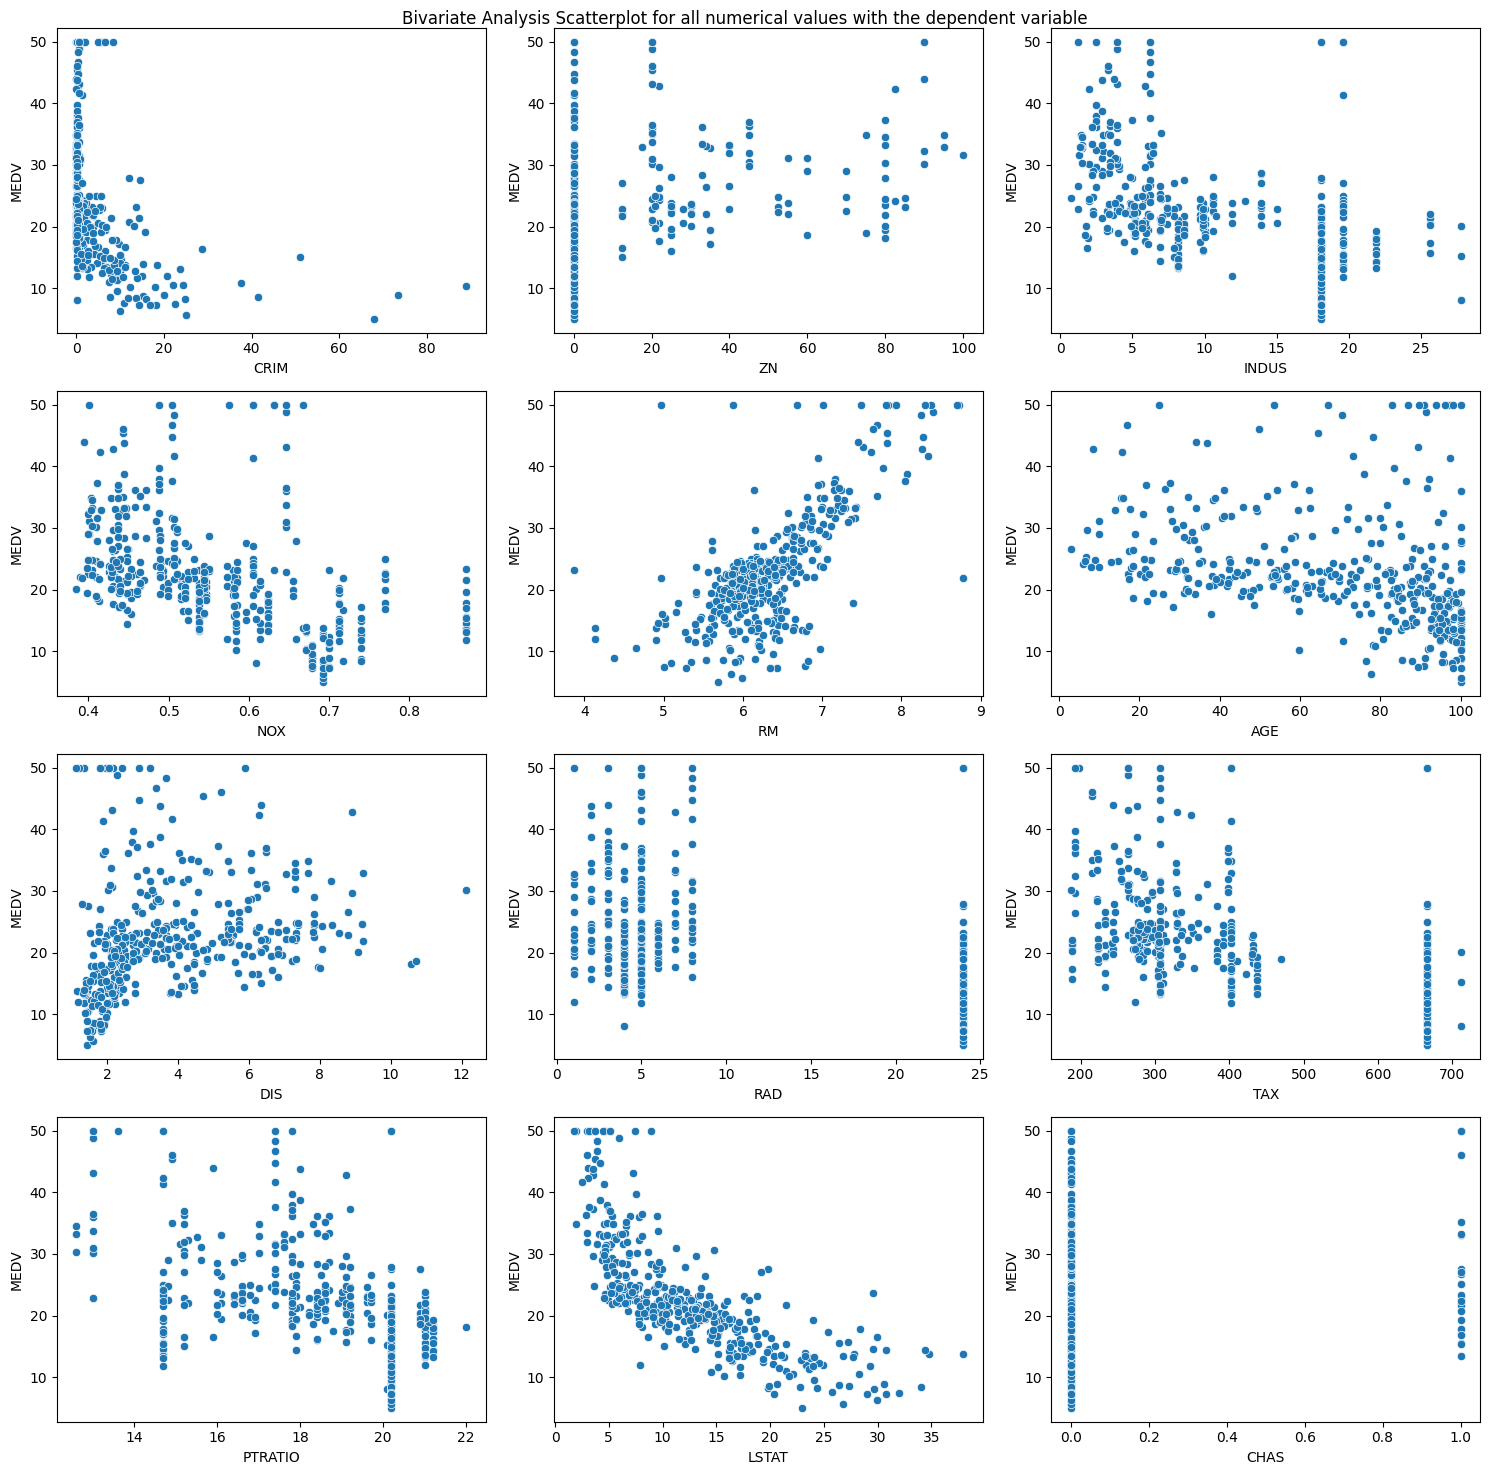

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

fig.suptitle('Bivariate Analysis Scatterplot for all numerical values with the dependent variable')

sns.scatterplot(x=train_df['CRIM'], y = train_df["MEDV"], ax=axes[0, 0])
sns.scatterplot(x=train_df['ZN'], y = train_df["MEDV"], ax=axes[0, 1])
sns.scatterplot(x=train_df['INDUS'], y = train_df["MEDV"], ax=axes[0, 2])
sns.scatterplot(x=train_df['NOX'], y = train_df["MEDV"], ax=axes[1, 0])
sns.scatterplot(x=train_df['RM'], y = train_df["MEDV"], ax=axes[1, 1])
sns.scatterplot(x=train_df['AGE'], y = train_df["MEDV"], ax=axes[1, 2])
sns.scatterplot(x=train_df['DIS'], y = train_df["MEDV"], ax=axes[2, 0])
sns.scatterplot(x=train_df['RAD'], y = train_df["MEDV"], ax=axes[2, 1])
sns.scatterplot(x=train_df['TAX'], y = train_df["MEDV"], ax=axes[2, 2])
sns.scatterplot(x=train_df['PTRATIO'], y = train_df["MEDV"], ax=axes[3, 0])
sns.scatterplot(x=train_df['LSTAT'], y = train_df["MEDV"], ax=axes[3, 1])
sns.scatterplot(x=train_df['CHAS'], y = train_df["MEDV"], ax=axes[3, 2])

plt.tight_layout()
plt.show()

Observations


*   From the above plots, it seems as if our bias is reconfirmed that the only independent variable that shows a strong positive linear relationship with our target variable, **MEDV**, is **RM**


*   From the above plots, it also seems as if our bias is reconfirmed that their is a strong negative correlation between our MEDV and LSTAT. The **lower** the **MEDV**, the **higher** the **LSTAT**.






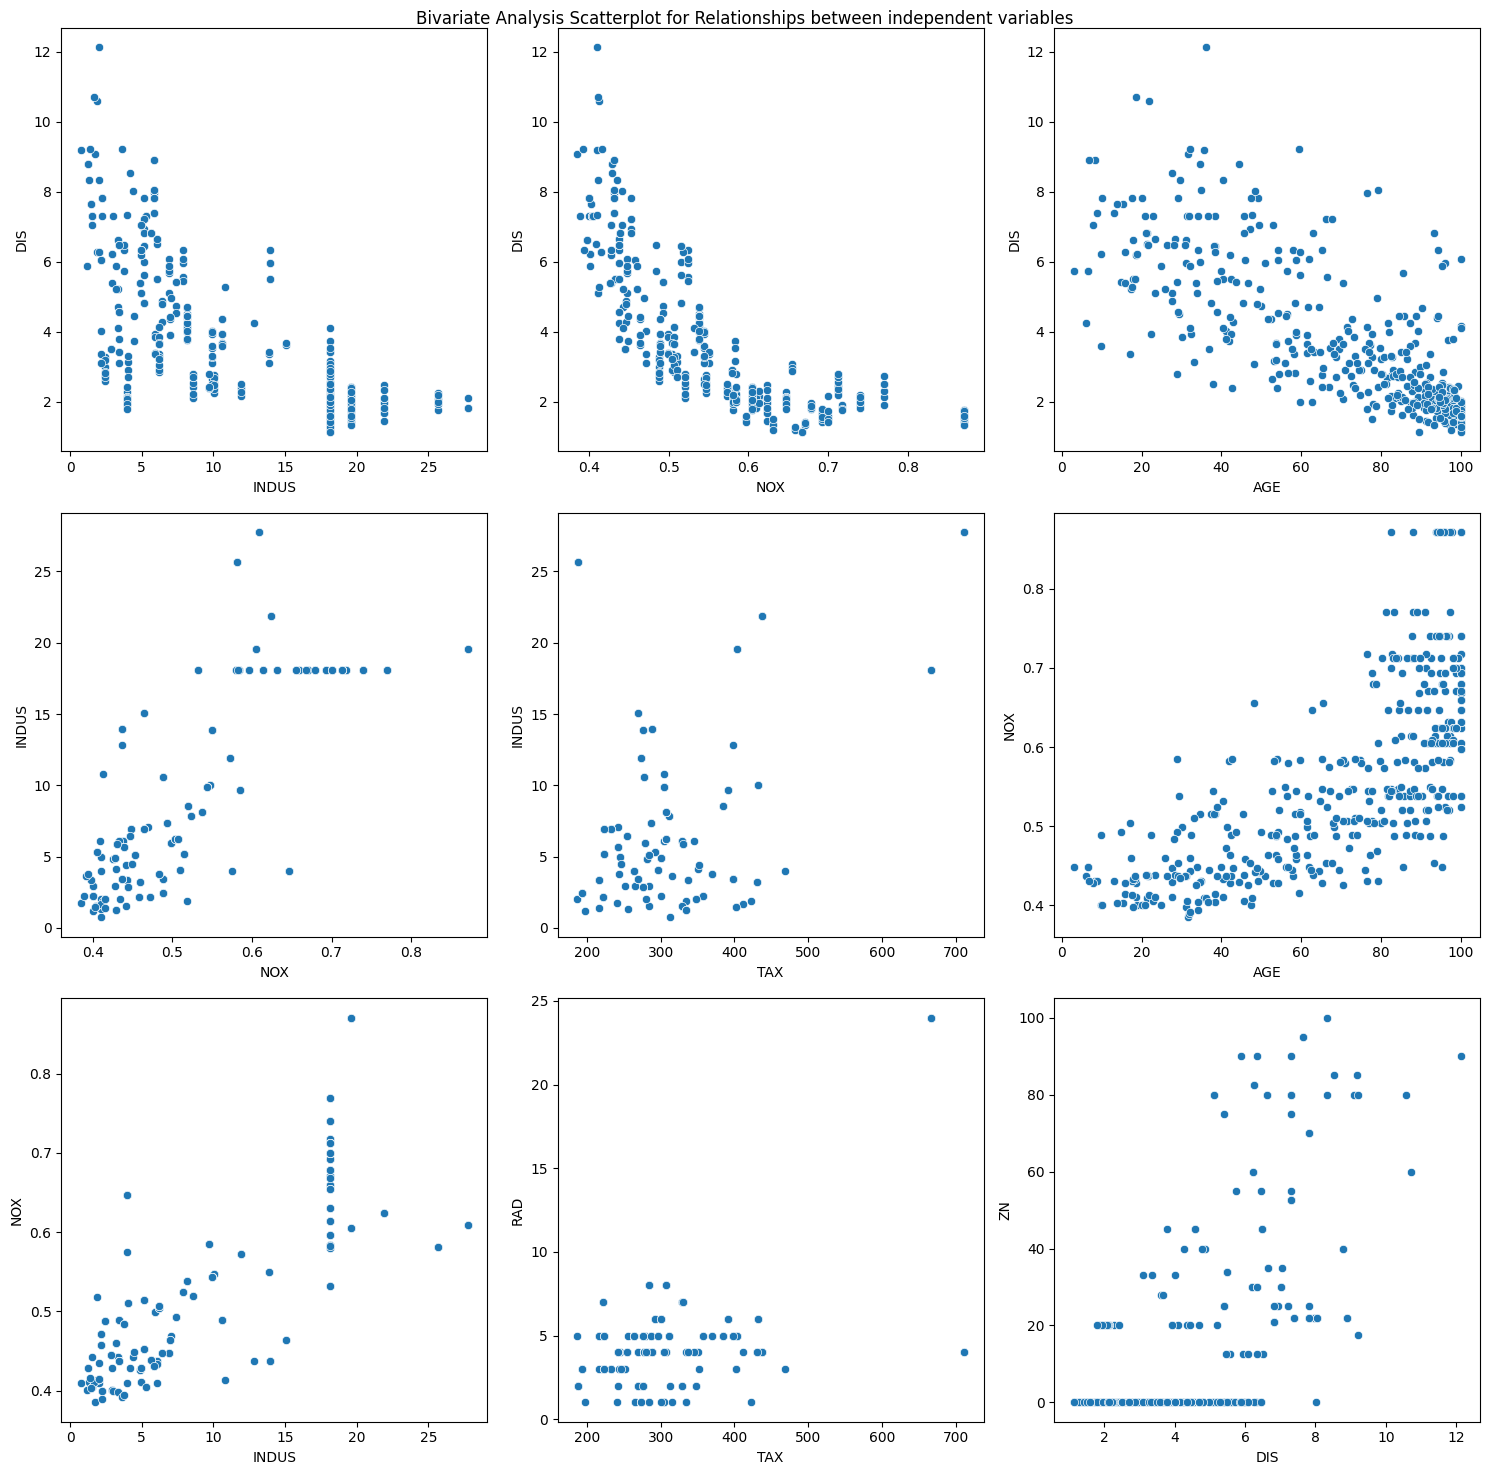

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

fig.suptitle('Bivariate Analysis Scatterplot for Relationships between independent variables')

sns.scatterplot(x=train_df['INDUS'], y = train_df["DIS"], ax=axes[0, 0])
sns.scatterplot(x=train_df['NOX'], y = train_df["DIS"], ax=axes[0, 1])
sns.scatterplot(x=train_df['AGE'], y = train_df["DIS"], ax=axes[0, 2])
sns.scatterplot(x=train_df['NOX'], y = train_df["INDUS"], ax=axes[1, 0])
sns.scatterplot(x=train_df['TAX'], y = train_df["INDUS"], ax=axes[1, 1])
sns.scatterplot(x=train_df['AGE'], y = train_df["NOX"], ax=axes[1, 2])
sns.scatterplot(x=train_df['INDUS'], y = train_df["NOX"], ax=axes[2, 0])
sns.scatterplot(x=train_df['TAX'], y = train_df["RAD"], ax=axes[2, 1])
sns.scatterplot(x=train_df['DIS'], y = train_df["ZN"], ax=axes[2, 2])


plt.tight_layout()
plt.show()

Observations:


*   The above scatterplots gives us an alternative view of the independent variables that we have stated that have either a strong  positive or negative correlation between one another based off our findings from the heat map




## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

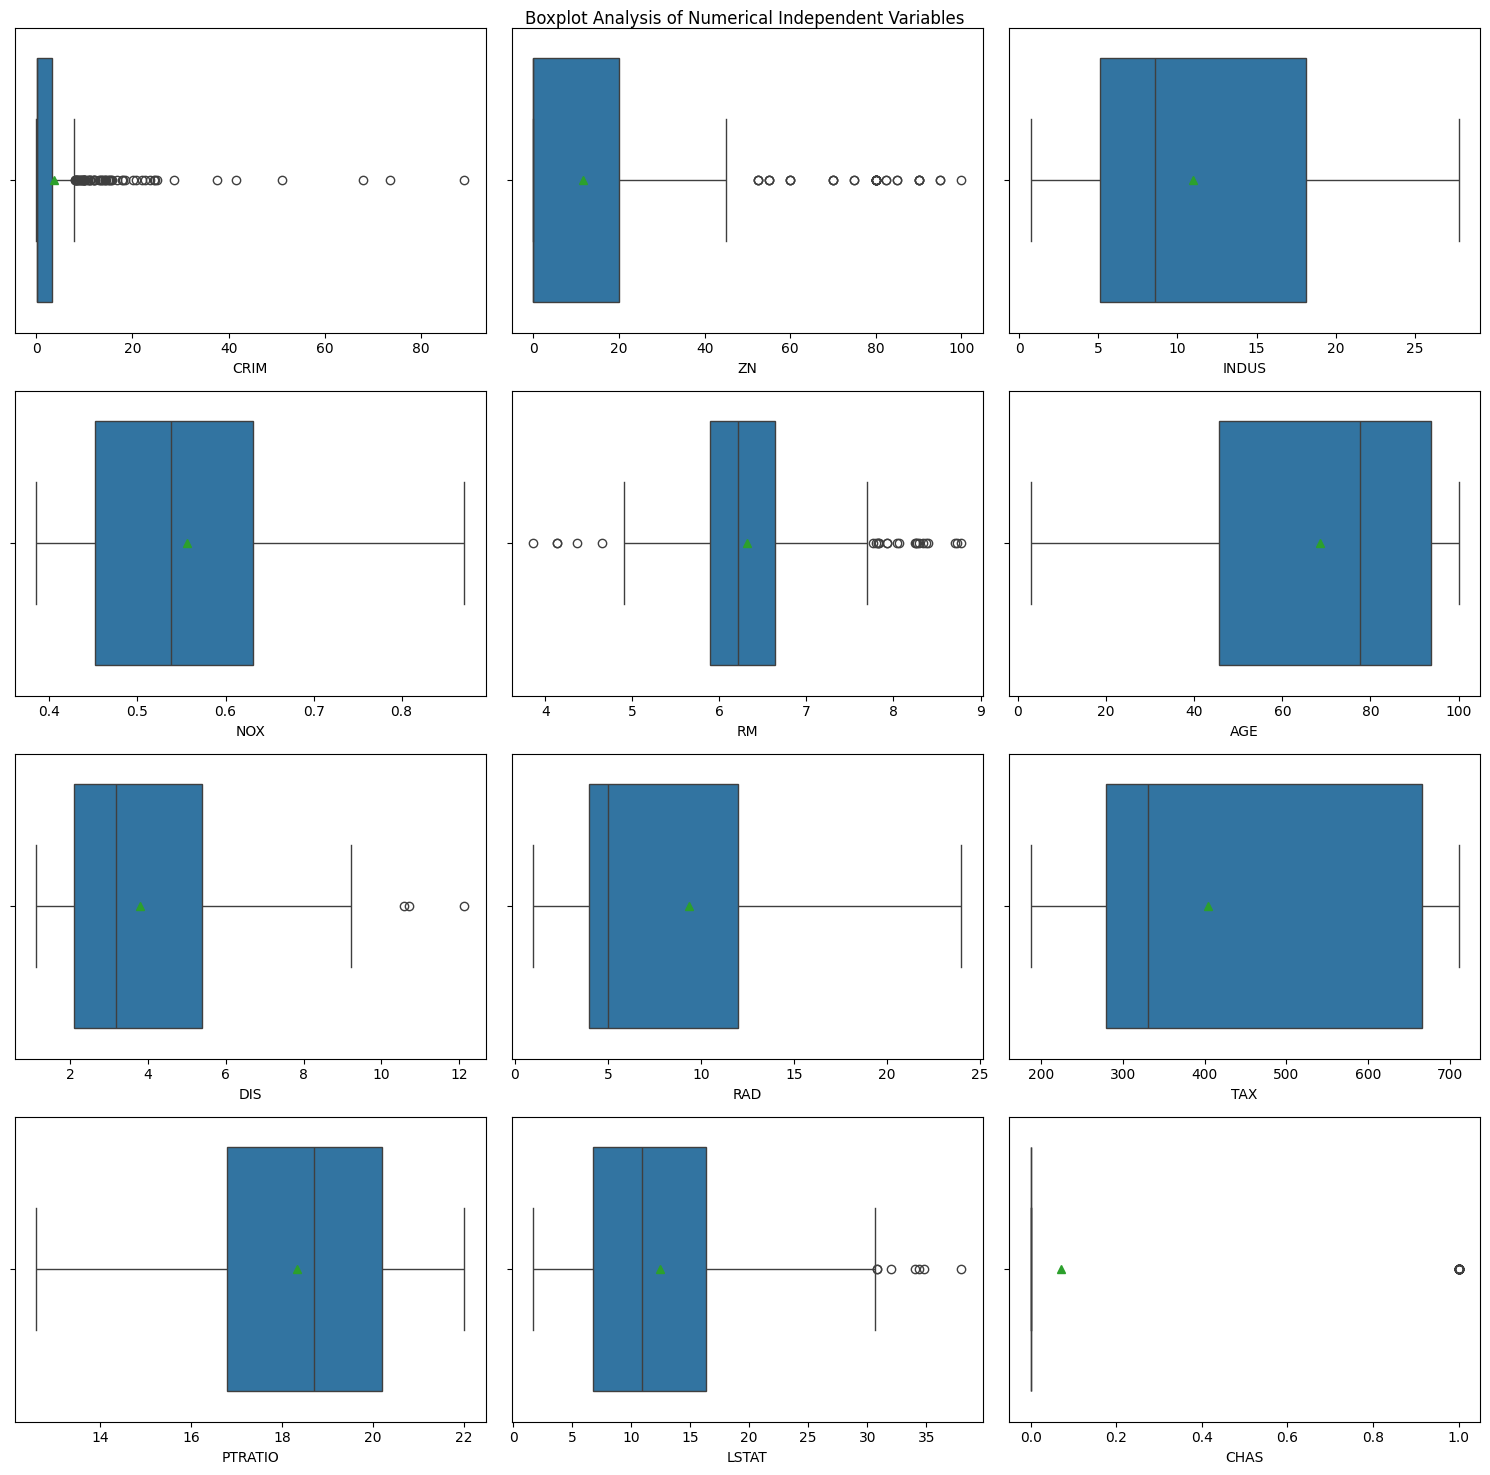

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

fig.suptitle('Boxplot Analysis of Numerical Independent Variables')

sns.boxplot(x=train_df['CRIM'], showmeans=True, ax=axes[0, 0])
sns.boxplot(x=train_df['ZN'], showmeans=True, ax=axes[0, 1])
sns.boxplot(x=train_df['INDUS'], showmeans=True, ax=axes[0, 2])
sns.boxplot(x=train_df['NOX'], showmeans=True, ax=axes[1, 0])
sns.boxplot(x=train_df['RM'], showmeans=True, ax=axes[1, 1])
sns.boxplot(x=train_df['AGE'], showmeans=True, ax=axes[1, 2])
sns.boxplot(x=train_df['DIS'], showmeans=True, ax=axes[2, 0])
sns.boxplot(x=train_df['RAD'], showmeans=True, ax=axes[2, 1])
sns.boxplot(x=train_df['TAX'], showmeans=True, ax=axes[2, 2])
sns.boxplot(x=train_df['PTRATIO'], showmeans=True, ax=axes[3, 0])
sns.boxplot(x=train_df['LSTAT'], showmeans=True, ax=axes[3, 1])
sns.boxplot(x=train_df['CHAS'], showmeans=True, ax=axes[3, 2])

plt.tight_layout()
plt.show()

Observations


*   The above plots, gives me a picture of what independent variables have a significant amount of outliers and skewed distribution.




Z-Score

In [ ]:
#calculating z-score to remove outliers from our data
z_scores = np.abs(stats.zscore(train_df))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
train_df_cleaned = train_df[~outliers]
train_features_cleaned = train_df_cleaned.drop(['MEDV', "CHAS"], axis=1)
train_target_cleaned = train_df_cleaned['MEDV']

print("Cleaned Data without Outliers:")
print(train_df_cleaned.head())
print("Cleaned Data w/o Target and Dummy Variable")
print(train_features_cleaned)


Cleaned Data without Outliers:
         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   

     PTRATIO  LSTAT  MEDV  
477     20.2  24.91  12.0  
15      21.0   8.47  19.9  
332     16.9   7.83  19.4  
423     20.2  23.29  13.4  
19      21.0  11.28  18.2  
Cleaned Data w/o Target and Dummy Variable
         CRIM    ZN  INDUS     NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
477  15.02340   0.0  18.10  0.6140  5.304  97.3  2.1007   24  666     20.2   
15    0.62739   0.0   8.14  0.5380  5.834  56.5  4.4986    4  307     21.0   
332   0.03466  35.0   6.06  0.4379  6.031  23.3  6.6407    1  304     16.

Observations



*   There was no missing treatment that needed to be imputed in the datatset, but we did remove the outliers based off our findings of any independent variable that had points a z score > 3
*   We also removed the dummy variable **CHAS** from the dataset because based off my findings I did not see any signficant correlation that would deem **CHAS** as a strong predictor in predicting the target variable **MEDV**



In [ ]:
# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Applying fit_transform on the training features data
scaled_train_features = scaler.fit_transform(train_features_cleaned)

# The above scaler returns the data in array format, below we are converting it to pandas DataFrame
scaled_train_features = pd.DataFrame(scaled_train_features, columns=train_features_cleaned.columns, index=train_features_cleaned.index)

scaled_train_features_df = pd.concat([scaled_train_features, train_target_cleaned], axis=1)
# First few rows of scaled train features
scaled_train_features_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
477,2.406239,-0.495801,1.061116,0.543475,-1.580321,1.050645,-0.858795,1.777290,1.631720,0.821588,1.852615,12.0
15,-0.411884,-0.495801,-0.401088,-0.132267,-0.738411,-0.421613,0.342049,-0.602887,-0.560170,1.185579,-0.598214,19.9
332,-0.527916,1.291218,-0.706448,-1.022290,-0.425475,-1.619626,1.414792,-0.959914,-0.578487,-0.679876,-0.693623,19.4
423,0.845470,-0.495801,1.061116,0.543475,-0.311102,0.610411,-0.898308,1.777290,1.631720,0.821588,1.611110,13.4
19,-0.392620,-0.495801,-0.401088,-0.132267,-0.908382,0.047489,-0.009555,-0.602887,-0.560170,1.185579,-0.179307,18.2


## Model Building - Linear Regression

In [ ]:
scaled_train_features = sm.add_constant(scaled_train_features)

ols_model = sm.OLS(train_target_cleaned, scaled_train_features)

ols_res_0 = ols_model.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     98.18
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           5.06e-98
Time:                        01:41:12   Log-Likelihood:                -988.70
No. Observations:                 349   AIC:                             2001.
Df Residuals:                     337   BIC:                             2048.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2427      0.224     99.290      0.0

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

**Observations**


*   **Rsquared** for the first iteration of our model is **77%**


*   Not all variables are statistically represented as strong predictors to predict our target variable **MEDV**. Therefore, we will cross reference our **p-value** against every independent variable to check there significance


*   If **p-value** is **less than .05** it is considered to be **statistically significant** with a confidence level of **95%**




**Interpretation of Regression Results**


*  **Adj. R Squared** reflects the fit of the model
    *    It ranges from **0 to 1**, the higher the value the **"best fit"** the model is









**Removing Multicollinearity**


*   **Multicollinearity** is when we see a significant high correlation in independent variables. This phenomena can negatively affect our regression model results and can be problematic when we go to fit our model and interpret our results. Independent variables should be independent from one another, or else it can can cause the coefficients that the model suggest unreliable.

**How To Detect**


*   Use the **Variance Inflation Factor** to measure the inflation in the variances of the **estimated regression coefficients** by existence of correlation among the predictor variables in the model


  *   **VIF=1:** No correlation between the nth predictor and the remaining predictor variables, hence no inflation  of the estimated regression coefficient
  *   **VIF>5 or close to 5:** Moderate VIF


  *   **VIF>=10:** Signs of high collinearity










In [ ]:
vif_series=pd.Series(
    [variance_inflation_factor(scaled_train_features.values, i) for i in range(scaled_train_features.shape[1])],
    index=scaled_train_features.columns,
    dtype = float)
print("VIF Scores:")
print(vif_series)

VIF Scores:
const      1.000000
CRIM       3.518329
ZN         2.147074
INDUS      3.555608
NOX        4.548034
RM         1.883759
AGE        2.844811
DIS        3.808233
RAD        8.570552
TAX        8.177652
PTRATIO    1.762304
LSTAT      3.063317
dtype: float64


In [ ]:
scaled_train_features_new = scaled_train_features.drop(["RAD", "TAX"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(scaled_train_features_new.values, i) for i in range(scaled_train_features_new.shape[1])],
    index=scaled_train_features_new.columns,
    dtype = float)
print("VIF Scores:")
print(vif_series)

VIF Scores:
const      1.000000
CRIM       1.898306
ZN         2.014063
INDUS      2.958725
NOX        4.096071
RM         1.770879
AGE        2.789509
DIS        3.776096
PTRATIO    1.529221
LSTAT      3.060070
dtype: float64


In [ ]:
ols_model_2 = sm.OLS(train_target_cleaned, scaled_train_features_new)

ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     116.5
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.94e-98
Time:                        01:49:32   Log-Likelihood:                -993.41
No. Observations:                 349   AIC:                             2007.
Df Residuals:                     339   BIC:                             2045.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2427      0.226     98.249      0.0

In [ ]:
scaled_train_features_new1 = scaled_train_features_new.drop(["ZN"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(scaled_train_features_new1.values, i) for i in range(scaled_train_features_new1.shape[1])],
    index=scaled_train_features_new1.columns,
    dtype = float)

print("VIF Scores:")
print(vif_series)

VIF Scores:
const      1.000000
CRIM       1.834939
INDUS      2.958719
NOX        4.082597
RM         1.749308
AGE        2.767397
DIS        3.251806
PTRATIO    1.341297
LSTAT      3.054597
dtype: float64


In [ ]:
ols_model_3 = sm.OLS(train_target_cleaned, scaled_train_features_new1)

ols_res_3 = ols_model_3.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     116.5
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.94e-98
Time:                        01:52:06   Log-Likelihood:                -993.41
No. Observations:                 349   AIC:                             2007.
Df Residuals:                     339   BIC:                             2045.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2427      0.226     98.249      0.0

In [ ]:
scaled_train_features_new2 = scaled_train_features_new1.drop(["INDUS"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(scaled_train_features_new2.values, i) for i in range(scaled_train_features_new2.shape[1])],
    index=scaled_train_features_new2.columns,
    dtype = float)

print("VIF Scores:")
print(vif_series)

VIF Scores:
const      1.000000
CRIM       1.828525
NOX        3.513221
RM         1.704431
AGE        2.767028
DIS        3.105431
PTRATIO    1.280798
LSTAT      3.024701
dtype: float64


In [ ]:
ols_model_4 = sm.OLS(train_target_cleaned, scaled_train_features_new2)

ols_res_4 = ols_model_4.fit()

print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          6.51e-100
Time:                        01:52:30   Log-Likelihood:                -994.35
No. Observations:                 349   AIC:                             2005.
Df Residuals:                     341   BIC:                             2036.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2427      0.226     98.273      0.0

In [ ]:
scaled_train_features_new3 = scaled_train_features_new2.drop(["AGE"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(scaled_train_features_new3.values, i) for i in range(scaled_train_features_new3.shape[1])],
    index=scaled_train_features_new3.columns,
    dtype = float)

print("VIF Scores:")
print(vif_series)

VIF Scores:
const      1.000000
CRIM       1.796716
NOX        3.317578
RM         1.625244
DIS        2.621283
PTRATIO    1.267010
LSTAT      2.689065
dtype: float64


In [ ]:
ols_model_5 = sm.OLS(train_target_cleaned, scaled_train_features_new3)

ols_res_5 = ols_model_5.fit()

print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     173.6
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          1.32e-100
Time:                        02:16:30   Log-Likelihood:                -995.40
No. Observations:                 349   AIC:                             2005.
Df Residuals:                     342   BIC:                             2032.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2427      0.227     98.121      0.0

Observations:



*   **All** the VIF Scores are now **less than** 5 indicating **no multicollinearity.**
Now, all the p values are lesser than 0.05 implying all the current variables are significant for the model.
The R-Squared value did not change by much. It is still coming out to be **.75%** which implies that all other variables **were not** adding any value to the model.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [ ]:
residuals = ols_res_5.resid

In [ ]:
residuals.mean()

-7.0850679668915434e-15

<Axes: ylabel='Count'>

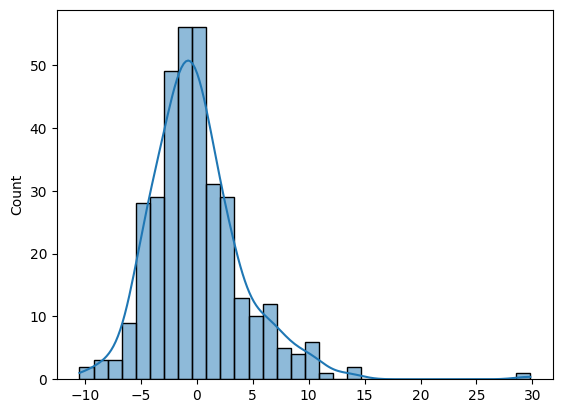

In [ ]:
sns.histplot(residuals, kde=True)

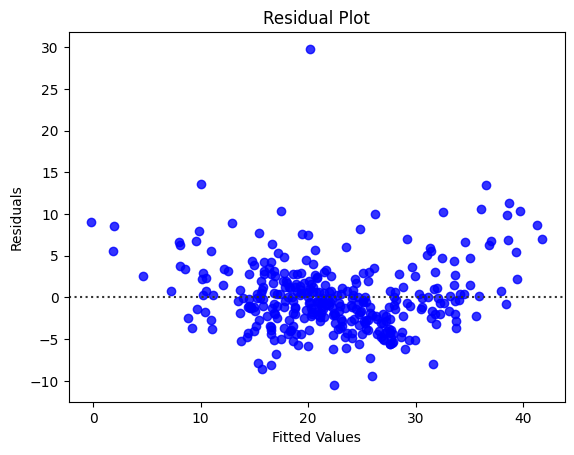

In [ ]:
fitted = ols_res_5.fittedvalues
sns.residplot(x = fitted, y = residuals, color = "blue")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Log transformation on the target variable
train_target_log = np.log(train_target_cleaned)

In [ ]:
# Fitting new model with the transformed target variable
ols_model_5 = sm.OLS(train_target_log, scaled_train_features_new3)

ols_res_5 = ols_model_5.fit()

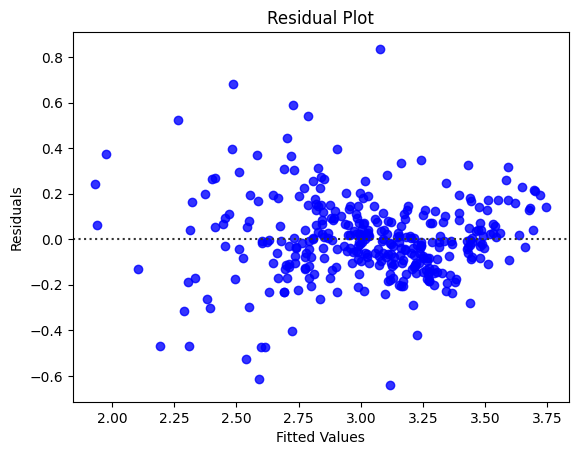

In [ ]:
# Predicted Values
fitted = ols_res_5.fittedvalues

residuals = ols_res_5.resid

sns.residplot(x = fitted, y = residuals, color = "blue")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          3.54e-110
Time:                        02:35:06   Log-Likelihood:                 104.55
No. Observations:                 349   AIC:                            -195.1
Df Residuals:                     342   BIC:                            -168.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0309      0.010    312.559      0.0

We will use **Goldfeld–Quandt** test to check **homoscedasticity**.

**Null hypothesis :** Residuals are homoscedastic (*variance is of the residuals are symmetrically distibuted across the regression line*)

**Alternate hypothesis **: Residuals are hetroscedastic (**variance is unequal for the residuals across the regression line, nonsymmetrical**)

In [ ]:
# Perform White's test for heteroskedasticity
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(train_target_log, scaled_train_features_new2)

lzip(name, test)

[('F statistic', 1.0456794634678668), ('p-value', 0.38671341644936896)]

**Observations**


*   As we observe from the above test, the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic


We have verified all assumptions of the linear regression model. The final equation of the model is as follows:

*log*(**MEDV**) = *3.0309* + *-0.0763* * **CRIM** + *-0.0582* * **NOX** + *0.0866* * **RM** + *-0.0787* * **DIS** + *-0.0778* * **PTRATIO** + *-0.1944* * **LSTAT**



## Final Model

In [ ]:
without_const = scaled_train_features.iloc[:, 1:]

test_features = pd.DataFrame(test_df, columns = without_const.columns)

test_features_scaled = scaler.transform(test_features)

test_features_scaled = pd.DataFrame(test_features_scaled, columns = without_const.columns, index = test_df.index)

test_features_scaled = sm.add_constant(test_features_scaled)

test_features_scaled = test_features_scaled.drop(["RAD", "TAX", "ZN", "INDUS","AGE"], axis=1)

test_features_scaled.head()



,const,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
173,1.0,-0.516734,-0.381225,0.186101,-0.585564,-0.816373,-0.513240
274,1.0,-0.523652,-0.941379,0.729372,0.131217,-0.361384,-1.334655
491,1.0,-0.514001,0.499018,-0.501723,-0.975279,0.776089,0.832927
72,1.0,-0.516761,-1.243685,-0.371465,0.737023,0.366599,-1.037992
452,1.0,0.461737,1.423718,-0.002931,-0.724834,0.821588,0.713665


R-Squared

This metrics gives us an indication on how well our model is from the baseline model

In [ ]:
print(ols_res_5.rsquared)

0.7828437582900072


Mean Squared Error

This metric measures the avg. of the squares of errors between the estimated and actual values

In [ ]:
print(ols_res_5.mse_resid)

0.03281821460309425


Root Mean Squared Error

We are taking the avg and the sqrt of  MSE to RMSE

In [ ]:
print(np.sqrt(ols_res_5.mse_resid))

0.18115798244376166


Cross Validation Score

Identifying if the model we have built is **underfitted**, **overfitted**, or **just right fit** model

In [ ]:
# Fitting linear model

linearregression = LinearRegression()

cv_Score1 = cross_val_score(linearregression, scaled_train_features_new3, train_target_log, cv = 10)

cv_Score2 = cross_val_score(linearregression, scaled_train_features_new3, train_target_log, cv = 10, scoring = "neg_mean_squared_error")

print("Rsquared: %0.3f (+/- %0.3f)" % (cv_Score1.mean(), cv_Score1.std()*2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score2.mean(), cv_Score2.std()*2))

Rsquared: 0.752 (+/- 0.237)
Mean Squared Error: 0.034 (+/- 0.021)


Observations



*   The R-Squared on cross validation is almost similar to the R-Squared on the trainind dataset
*   The MSE on cross validation is .03 which almost identical to the MSE on the training dataset



In [ ]:
 # These test predictions will be on a log scale
 test_predictions = ols_res_5.predict(test_features_scaled)

 # We are converting the log scale predictions to its original scale
 test_predictions_inverse_transformed = np.exp(test_predictions)

 test_predictions_inverse_transformed

,0
173,27.607826
274,32.011487
491,17.325512
72,25.175462
452,15.909968
...,...
412,6.882794
436,13.844402
411,14.314219
86,21.050896


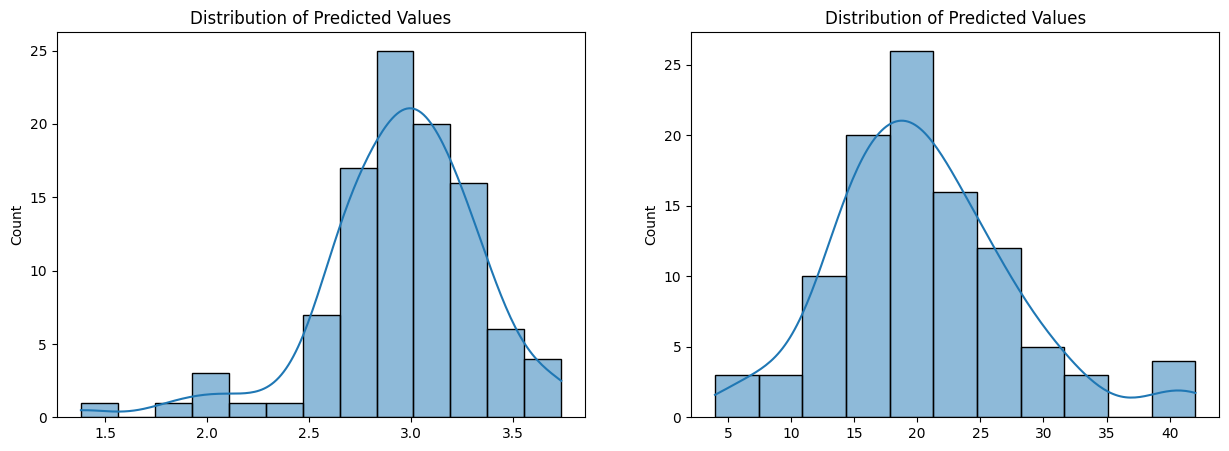

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.histplot(test_predictions, ax = ax[0], kde=True)

sns.histplot(test_predictions_inverse_transformed, ax = ax[1], kde=True)

set_title = ("Distribution of Predicted Values")
ax[0].set_title(set_title)
ax[1].set_title(set_title)

plt.show()

Took **exponentiation** to tranform the data back to its original scale by doing the **inverse** of log transformation

## Actionable Insights and Recommendations



1.   We performed EDA, univariate and bivariate analysis, on all the variables in the dataset


2.   We then used a zscore threshold of >3 to detect and apply an outlier treatment
using the relationship between variables.

3.   We started the model building process with all the features.
4.   We removed multicollinearity from the data and analyzed the model summary report to drop insignificant features where there **(p-value > .05)**
5.   We checked for different assumptions of linear regression and fixed the model iteratively if any assumptions did not hold true.
6. Finally, we evaluated the model using different evaluation metrics such **Rsquared, RMSE, and MSE**









**Lastly, the model equation is:**

 *log*(**MEDV**) = *3.0309* + *-0.0763* **CRIM** + *-0.0582* * **NOX** + *0.0866* * **RM** + *-0.0787* * **DIS** + *-0.0778* * **PTRATIO** + *-0.1944* * **LSTAT**

After interpreting this linear regression equation, it is clear that the number of rooms had a strong correlation with our target variable, MEDV. That allowed us to create a sufficient baseline variable in our prediction model to help us predict the prices of homes in the Boston Metropolitan Area and have a normal distribution with our test set on the unseen data. Although, our final model had an Rsquared of 75% accuracy on our test set, I believe adding more complexity to the model by introducing more features could potententially allow us to increasing the accuracy of our prediction model even further.

___